# Supplementary Fig. 5 Evaluating batch effects in Brain Cell Atlas on scANVI latent space.

## Load

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
from sklearn.utils import resample
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder

In [4]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Read in

In [ ]:
ad=sc.read('/home/huang_ziliang/project/brain/data/mergeData/norm_latent_umap_merged_200w_Adult.h5ad')

/home/huang_yin/anaconda3/envs/sc07/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
ad

AnnData object with n_obs × n_vars = 2000000 × 1841
    obs: 'cell_ID', 'seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'donor_status', 'original_name', 'organ', 'region', 'subregion', 'sample_status', 'treatment', 'ethnicity', 'if_patient', 'species', 'sample_type', 'seq_method', 'project_code', 'sample_ID', 'reference', 'original_name2', 'Siletti_singleCellNet', 'Siletti_SingleR', 'Siletti_scPred', 'Siletti_scMap', 'Siletti_CHETAH', 'Siletti_scArches', 'Siletti_ACTINN', 'Siletti_modf_SCANVI_L1', 'Siletti_modf_SCANVI_L2', 'cell_type', 'DEGregion', 'data_type'
    uns: 'Siletti_modf_SCANVI_L1_colors', 'cell_type_colors', 'data_type_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_cca', 'X_cca.aligned', 'X_pca', 'X_pca_corrected', 'X_pca_harmony', 'X_pca_opt', 'X_scvi', 'X_tsne', 'X_umap', 'X_umapHmny', 'X_umapRaw'
    obsp: 'connectivities', 'distances'

In [ ]:
ad.obs.Siletti_modf_SCANVI_L1.value_counts()

Astrocyte                              279660
Committed oligodendrocyte precursor    233642
Microglia                              192393
Upper-layer intratelencephalic         158446
Oligodendrocyte                        144605
Splatter                                97034
Miscellaneous                           93147
Deep-layer intratelencephalic           92144
CGE interneuron                         91466
Vascular                                90376
MGE interneuron                         87835
Oligodendrocyte precursor               66278
Medium spiny neuron                     45379
Hippocampal dentate gyrus               39487
Upper rhombic lip                       35097
Hippocampal CA1-3                       33489
Deep-layer corticothalamic and 6b       33407
Midbrain-derived inhibitory             32211
Amygdala excitatory                     29042
Fibroblast                              23378
Thalamic excitatory                     22266
LAMP5-LHX6 and Chandelier         

In [ ]:
ad.obs.Siletti_modf_SCANVI_L1.cat.categories

Index(['Amygdala excitatory', 'Astrocyte', 'Bergmann glia', 'CGE interneuron',
       'Cerebellar inhibitory', 'Choroid plexus',
       'Committed oligodendrocyte precursor',
       'Deep-layer corticothalamic and 6b', 'Deep-layer intratelencephalic',
       'Deep-layer near-projecting', 'Eccentric medium spiny neuron',
       'Ependymal', 'Fibroblast', 'Hippocampal CA1-3', 'Hippocampal CA4',
       'Hippocampal dentate gyrus', 'LAMP5-LHX6 and Chandelier',
       'Lower rhombic lip', 'MGE interneuron', 'Mammillary body',
       'Medium spiny neuron', 'Microglia', 'Midbrain-derived inhibitory',
       'Miscellaneous', 'Oligodendrocyte', 'Oligodendrocyte precursor',
       'Splatter', 'Thalamic excitatory', 'Upper rhombic lip',
       'Upper-layer intratelencephalic', 'Vascular'],
      dtype='object')

In [ ]:
len(ad.obs.Siletti_modf_SCANVI_L1.cat.categories)

31

## Silhouette score in each celltype

In [ ]:
siletti1=[]
for i in ad.obs.Siletti_modf_SCANVI_L1.cat.categories[19:]:
    try:
        x1=silhouette_score(ad.obsm['X_scvi'][ad.obs.Siletti_modf_SCANVI_L1==i], ad.obs.seq_tech[ad.obs.Siletti_modf_SCANVI_L1==i])
    except:
        x1=None
    try:
        x2=silhouette_score(ad.obsm['X_scvi'][ad.obs.Siletti_modf_SCANVI_L1==i], ad.obs['donor_gender'][ad.obs.Siletti_modf_SCANVI_L1==i])
    except:
        x2=None
    try:
        x3=silhouette_score(ad.obsm['X_scvi'][ad.obs.Siletti_modf_SCANVI_L1==i], ad.obs['donor_status'][ad.obs.Siletti_modf_SCANVI_L1==i])
    except:
        xe=None
    try:
        x4=silhouette_score(ad.obsm['X_scvi'][ad.obs.Siletti_modf_SCANVI_L1==i], ad.obs['region'][ad.obs.Siletti_modf_SCANVI_L1==i])
    except:
        x4=None
    print(i,[x1,x2,x3,x4])
    siletti1.append([x1,x2,x3,x4])

Mammillary body [None, 0.30948758, 0.65126413, 0.26064327]
Medium spiny neuron [0.01516136, 0.042076193, -0.1312427, -0.058078654]
Microglia [-0.15039644, 0.012937315, -0.17406657, -0.17115216]
Midbrain-derived inhibitory [0.17548442, 0.39517087, 0.014023948, -0.08870705]
Miscellaneous [-0.1818423, 0.007191021, -0.2080045, -0.15220042]
Oligodendrocyte [-0.1583202, -0.058791947, -0.1831578, -0.12384432]
Oligodendrocyte precursor [0.067332804, 0.014005537, -0.18641877, -0.118677296]
Splatter [0.06843707, 0.046596225, -0.11164011, -0.06635737]
Thalamic excitatory [-0.021049477, 0.27248338, 0.09530015, -0.07529852]
Upper rhombic lip [0.24433434, 0.2579895, 0.05112871, -0.16514099]
Upper-layer intratelencephalic [-0.1543589, -0.045204002, -0.12353121, -0.15990019]
Vascular [-0.08421288, 0.21449982, 0.017602464, -0.09527351]


In [ ]:
siletti1

[[None, 0.30948758, 0.65126413, 0.26064327],
 [0.01516136, 0.042076193, -0.1312427, -0.058078654],
 [-0.15039644, 0.012937315, -0.17406657, -0.17115216],
 [0.17548442, 0.39517087, 0.014023948, -0.08870705],
 [-0.1818423, 0.007191021, -0.2080045, -0.15220042],
 [-0.1583202, -0.058791947, -0.1831578, -0.12384432],
 [0.067332804, 0.014005537, -0.18641877, -0.118677296],
 [0.06843707, 0.046596225, -0.11164011, -0.06635737],
 [-0.021049477, 0.27248338, 0.09530015, -0.07529852],
 [0.24433434, 0.2579895, 0.05112871, -0.16514099],
 [-0.1543589, -0.045204002, -0.12353121, -0.15990019],
 [-0.08421288, 0.21449982, 0.017602464, -0.09527351]]

In [ ]:
siletti

[[-0.090846285, -0.032961328, -0.11543269, -0.059701424],
 [-0.08060227, -0.014634499, -0.12870377, -0.15161395],
 [0.56243896, 0.3779378, 0.33922234, -0.13392235],
 [-0.09362272, -0.036924433, -0.12718786, -0.2068842],
 [0.2901051, 0.25282514, -0.011343961, -0.14346837],
 [0.35566533, 0.32142803, 0.1514002, 0.05401859],
 [-0.021711044, -0.002987037, -0.16064341, -0.12889749],
 [-0.08513744, -0.029947802, -0.129365, -0.19705291],
 [-0.1546307, -0.061998133, -0.13681343, -0.18550941],
 [0.14275073, 0.06866733, -0.19779086, -0.08374928],
 [0.07819778, 0.10991859, -0.12478181, -0.017129697],
 [-0.100124575, -0.0037848772, -0.3142744, -0.12838526],
 [-0.004905104, 0.03671434, -0.18462004, -0.26817173],
 [0.013650563, -0.004861826, -0.05838722, 0.074965395],
 [0.05675385, 0.037957277, -0.019898985, -0.07805294],
 [0.08831123, -0.010567779, -0.05452744, -0.20431408],
 [-0.12707241, -0.0026655388, -0.18902719, -0.10167537],
 [0.38539466, 0.34951094, -0.14483027, -0.24659373],
 [-0.11314625, -

In [ ]:
len(siletti)

19

In [ ]:
results=pd.DataFrame(siletti+siletti1,index=list(ad.obs.Siletti_modf_SCANVI_L1.cat.categories),columns=['Seq tech','Donor gender','Donor status','Region'])

In [ ]:
results['Celltype']=list(results.index)

In [ ]:
results = results.melt(id_vars='Celltype', var_name='Batch', value_name='Siletti score')

In [ ]:
results

Seq tech  Donor gender  Donor status  \
Amygdala excitatory                 -0.090846     -0.032961     -0.115433   
Astrocyte                           -0.080602     -0.014634     -0.128704   
Bergmann glia                        0.562439      0.377938      0.339222   
CGE interneuron                     -0.093623     -0.036924     -0.127188   
Cerebellar inhibitory                0.290105      0.252825     -0.011344   
Choroid plexus                       0.355665      0.321428      0.151400   
Committed oligodendrocyte precursor -0.021711     -0.002987     -0.160643   
Deep-layer corticothalamic and 6b   -0.085137     -0.029948     -0.129365   
Deep-layer intratelencephalic       -0.154631     -0.061998     -0.136813   
Deep-layer near-projecting           0.142751      0.068667     -0.197791   
Eccentric medium spiny neuron        0.078198      0.109919     -0.124782   
Ependymal                           -0.100125     -0.003785     -0.314274   
Fibroblast                          -0.004905      0.036714     -0.184620   
Hippocampal CA1-3                    0.013651     -0.004862     -0.058387   
Hippocampal CA4                      0.056754      0.037957     -0.019899   
Hippocampal dentate gyrus            0.088311     -0.010568     -0.054527   
LAMP5-LHX6 and Chandelier           -0.127072     -0.002666     -0.189027   
Lower rhombic lip                    0.385395      0.349511     -0.144830   
MGE interneuron                     -0.113146     -0.050435     -0.172562   
Mammillary body                           NaN      0.309488      0.651264   
Medium spiny neuron                  0.015161      0.042076     -0.131243   
Microglia                           -0.150396      0.012937     -0.174067   
Midbrain-derived inhibitory          0.175484      0.395171      0.014024   
Miscellaneous                       -0.181842      0.007191     -0.208005   
Oligodendrocyte                     -0.158320     -0.058792     -0.183158   
Oligodendrocyte precursor            0.067333      0.014006     -0.186419   
Splatter                             0.068437      0.046596     -0.111640   
Thalamic excitatory                 -0.021049      0.272483      0.095300   
Upper rhombic lip                    0.244334      0.257989      0.051129   
Upper-layer intratelencephalic      -0.154359     -0.045204     -0.123531   
Vascular                            -0.084213      0.214500      0.017602   

                                       Region  \
Amygdala excitatory                 -0.059701   
Astrocyte                           -0.151614   
Bergmann glia                       -0.133922   
CGE interneuron                     -0.206884   
Cerebellar inhibitory               -0.143468   
Choroid plexus                       0.054019   
Committed oligodendrocyte precursor -0.128897   
Deep-layer corticothalamic and 6b   -0.197053   
Deep-layer intratelencephalic       -0.185509   
Deep-layer near-projecting          -0.083749   
Eccentric medium spiny neuron       -0.017130   
Ependymal                           -0.128385   
Fibroblast                          -0.268172   
Hippocampal CA1-3                    0.074965   
Hippocampal CA4                     -0.078053   
Hippocampal dentate gyrus           -0.204314   
LAMP5-LHX6 and Chandelier           -0.101675   
Lower rhombic lip                   -0.246594   
MGE interneuron                     -0.164977   
Mammillary body                      0.260643   
Medium spiny neuron                 -0.058079   
Microglia                           -0.171152   
Midbrain-derived inhibitory         -0.088707   
Miscellaneous                       -0.152200   
Oligodendrocyte                     -0.123844   
Oligodendrocyte precursor           -0.118677   
Splatter                            -0.066357   
Thalamic excitatory                 -0.075299   
Upper rhombic lip                   -0.165141   
Upper-layer intratelencephalic      -0.159900   
Vascular                            -0.095274   

   

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Seq tech', ylabel='Celltype'>

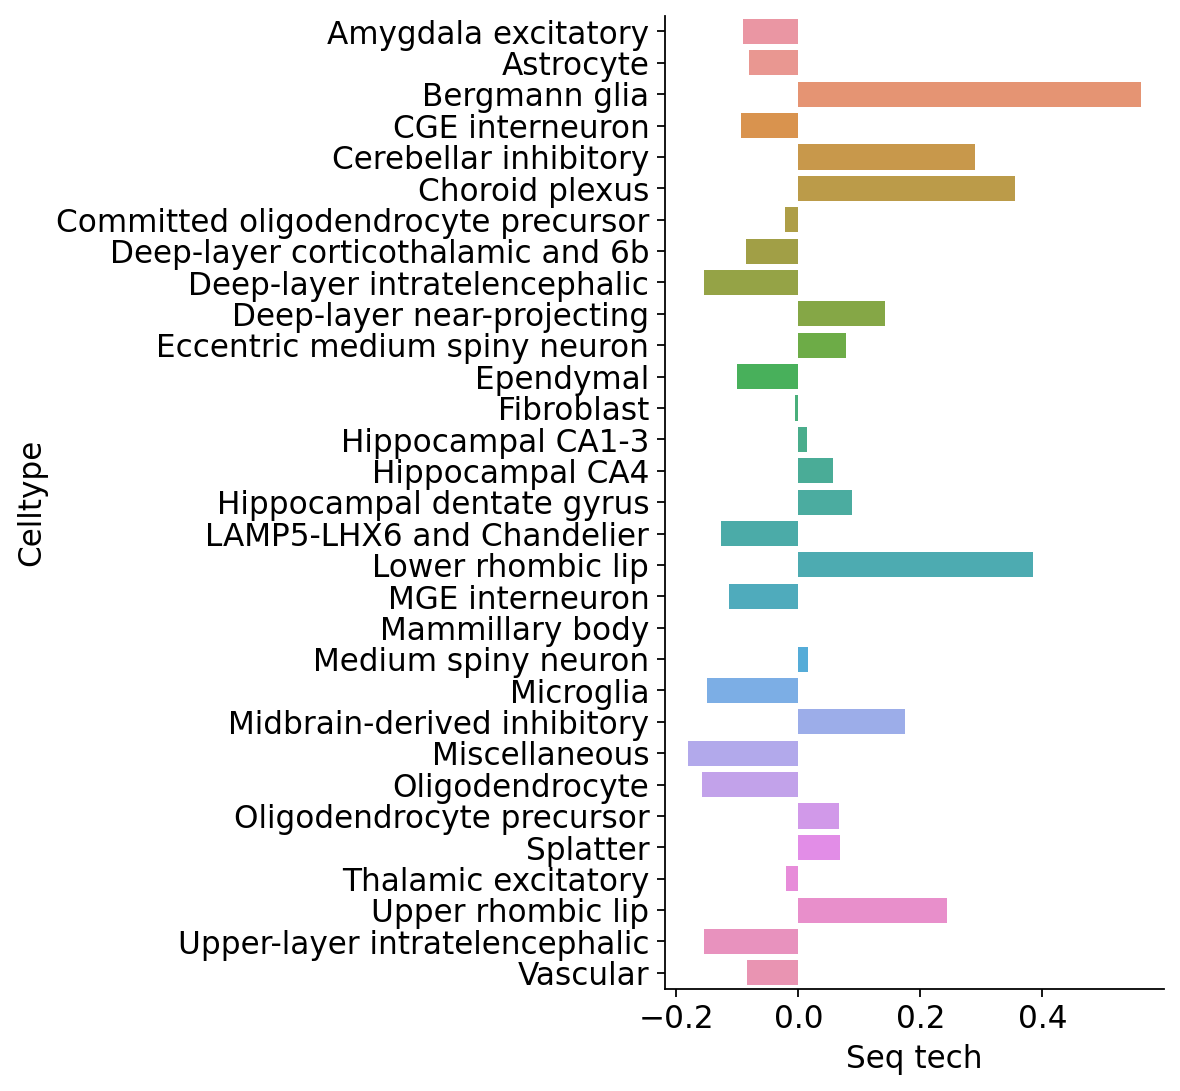

In [ ]:
figsize(4,8)
sns.barplot(x='Seq tech',y='Celltype',data=results)

<AxesSubplot:xlabel='Donor gender', ylabel='Celltype'>

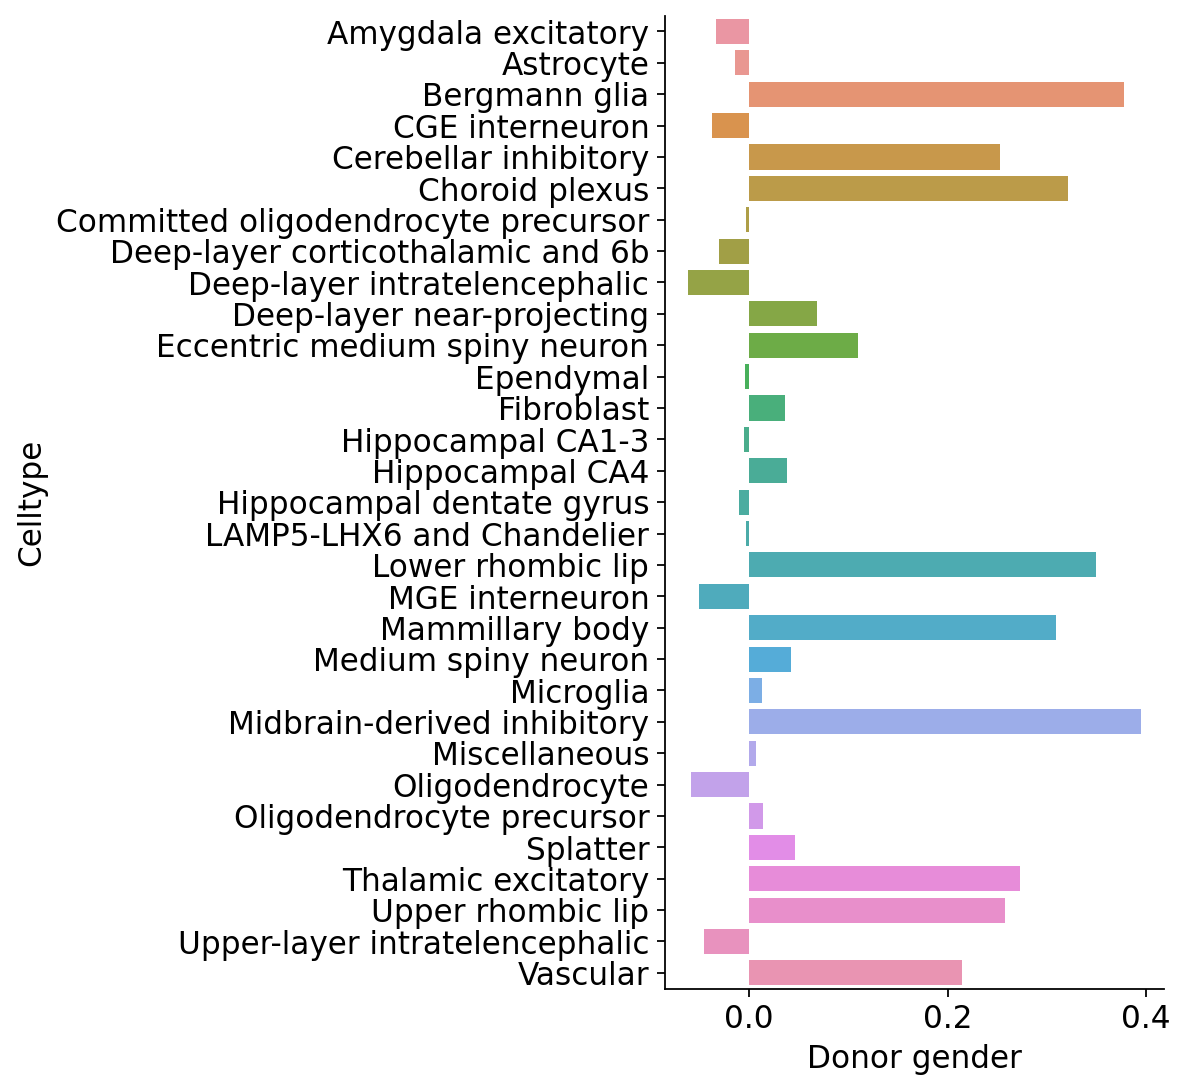

In [ ]:
figsize(4,8)
sns.barplot(x='Donor gender',y='Celltype',data=results)

<AxesSubplot:xlabel='Donor status', ylabel='Celltype'>

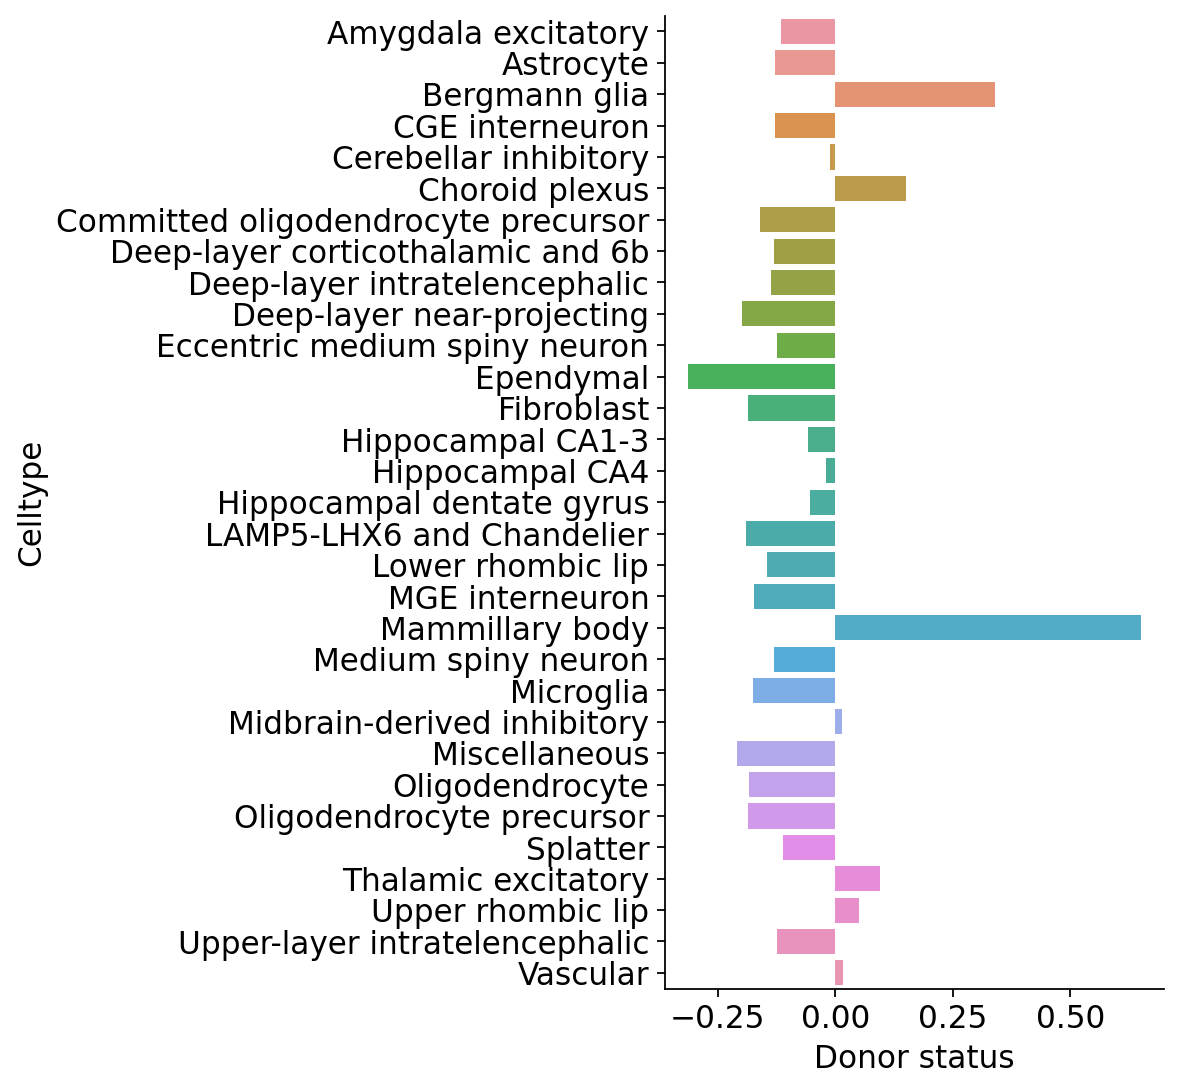

In [ ]:
figsize(4,8)
sns.barplot(x='Donor status',y='Celltype',data=results)

<AxesSubplot:xlabel='Region', ylabel='Celltype'>

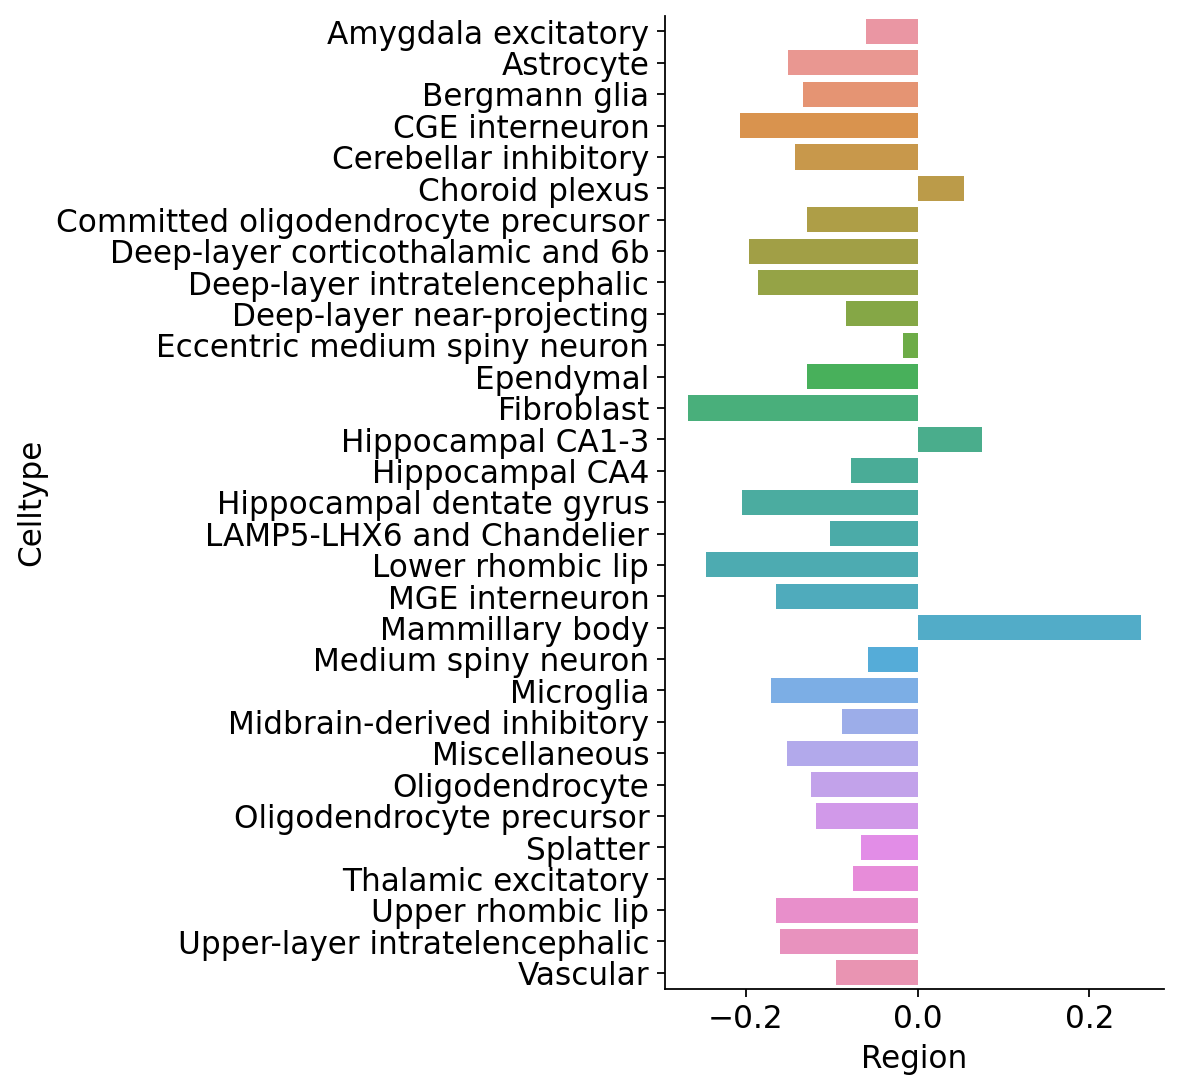

In [ ]:
figsize(4,8)
sns.barplot(x='Region',y='Celltype',data=results)

In [ ]:
ad.obs.seq_tech.value_counts()

10X             1936291
Split-seq         35362
Drop-seq          13789
Smart-seq v4      12048
mCEL-seq2          2000
STRT-seq            510
Name: seq_tech, dtype: int64

In [ ]:
ad.obs.seq_tech[ad.obs.Siletti_modf_SCANVI_L1=='Fibroblast'].value_counts()

10X             23248
Drop-seq           96
Split-seq          29
Smart-seq v4        4
mCEL-seq2           1
STRT-seq            0
Name: seq_tech, dtype: int64

In [ ]:
ad.obs['donor_gender'][ad.obs.Siletti_modf_SCANVI_L1=='Fibroblast'].value_counts()

M               10974
F               10421
Unclassified     1983
Name: donor_gender, dtype: int64

In [ ]:
ad.obs['donor_status'][ad.obs.Siletti_modf_SCANVI_L1=='Fibroblast'].value_counts()

Alzheimer's disease                         11377
Healthy                                      9568
Epilepsy                                     1696
Parkinson disease                             229
Unclassified                                   96
Lewy body dementia                             91
Amyotrophic lateral sclerosis                  82
Frontotemporal dementia                        76
Temporal lobe epilepsy                         47
Multiple sclerosis                             44
Autism spectrum disorder                       24
major depressive disorder                      20
Relapsing-remitting multiple sclerosis         15
Secondary progressive multiple sclerosis        7
Idiopathic Parkinson's disease                  6
Gliomas                                         0
Mild cognitive impairment                       0
Carcinoma                                       0
Name: donor_status, dtype: int64

In [ ]:
ad.obs['region'][ad.obs.Siletti_modf_SCANVI_L1=='Fibroblast'].value_counts()

Cerebral cortex      19457
Basal ganglia         1071
Thalamus               890
Hippocampus            795
Pons                   229
Midbrain               205
Grey matter            190
Medulla oblongata      164
Hypothalamus           105
Cerebellum              99
Amygdala                78
Cingulate cortex        32
White matter            31
Epithalamus             16
Spinal cord             15
Unclassified             1
Name: region, dtype: int64

## UMAP plots of the adult brain data

In [ ]:
ad.obs['seq_tech']

GATTGGTTCGCCGAGT-229MCX-0                           10X
TCAGTGAGTCGGTGAA_3-0                                10X
pPDsHSrSNxi2142d200429DAPIA_TCATGCCTCTTGGCTC-1-0    10X
10X330_6:GGGTATTAGTGTACCT-0                         10X
ATCGTAGCACCCAACG-304MCX-0                           10X
                                                   ... 
GGAGCAACAACGTTAC-1-1-0                              10X
AACTTCTTCCATCTGC-1-15-0                             10X
TCCTCCCTCCTCGATC-1-22-0                             10X
HSB179_6_eDG_GGGACCTCATCTTCGC-0                     10X
CCTCCAATCTTCCTAA-1-19-0                             10X
Name: seq_tech, Length: 2000000, dtype: category
Categories (6, object): ['10X', 'Drop-seq', 'STRT-seq', 'Smart-seq v4', 'Split-seq', 'mCEL-seq2']

In [ ]:
ad.obs['seq_tech']=ad.obs['seq_tech'].cat.reorder_categories(['Drop-seq', 'STRT-seq', 'Smart-seq v4', 'Split-seq', 'mCEL-seq2','10X'])

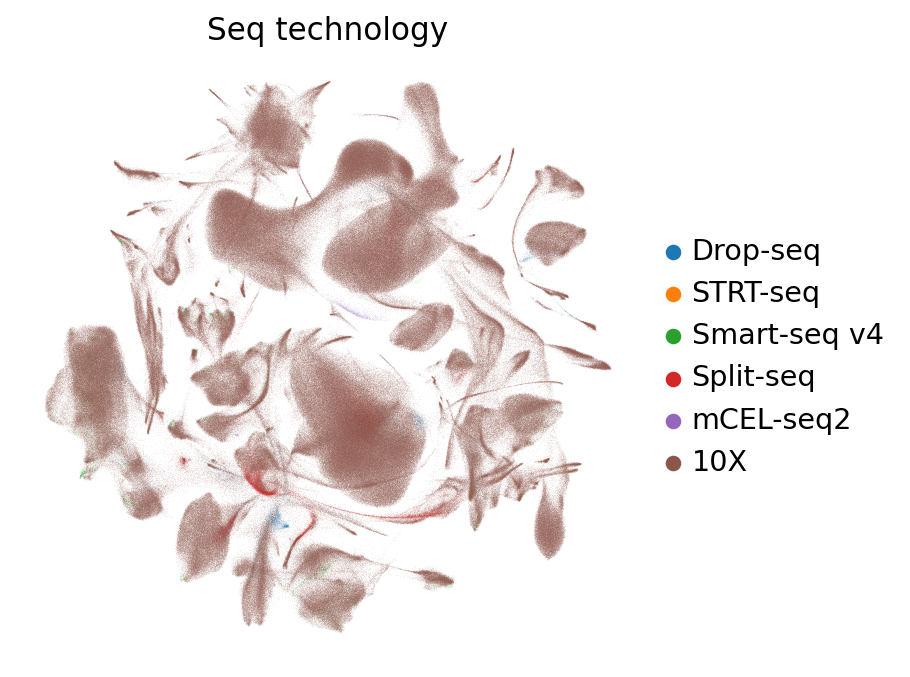

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['seq_tech'], frameon=False,title='Seq technology')

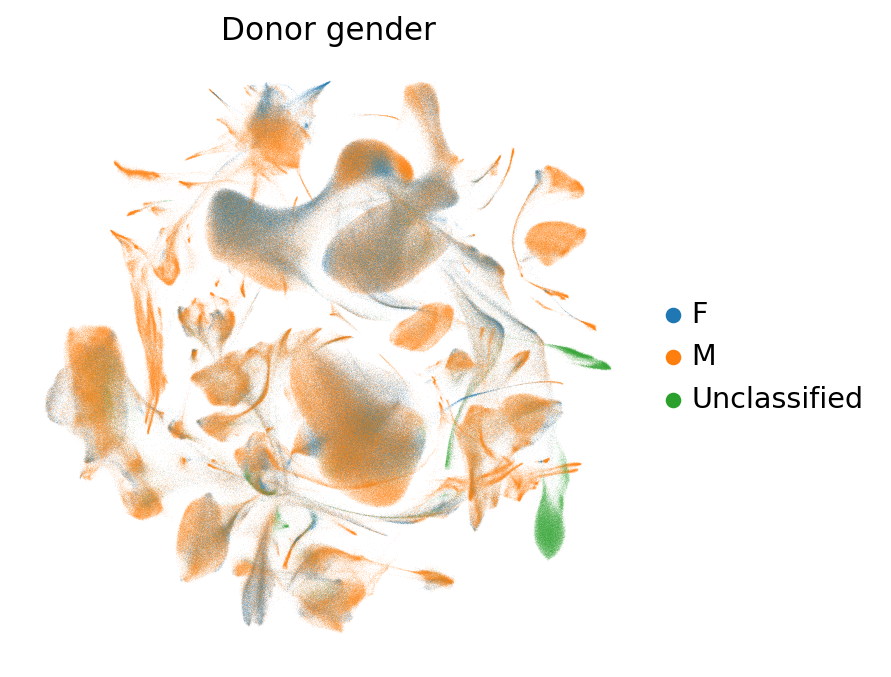

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['donor_gender'], frameon=False, title='Donor gender')

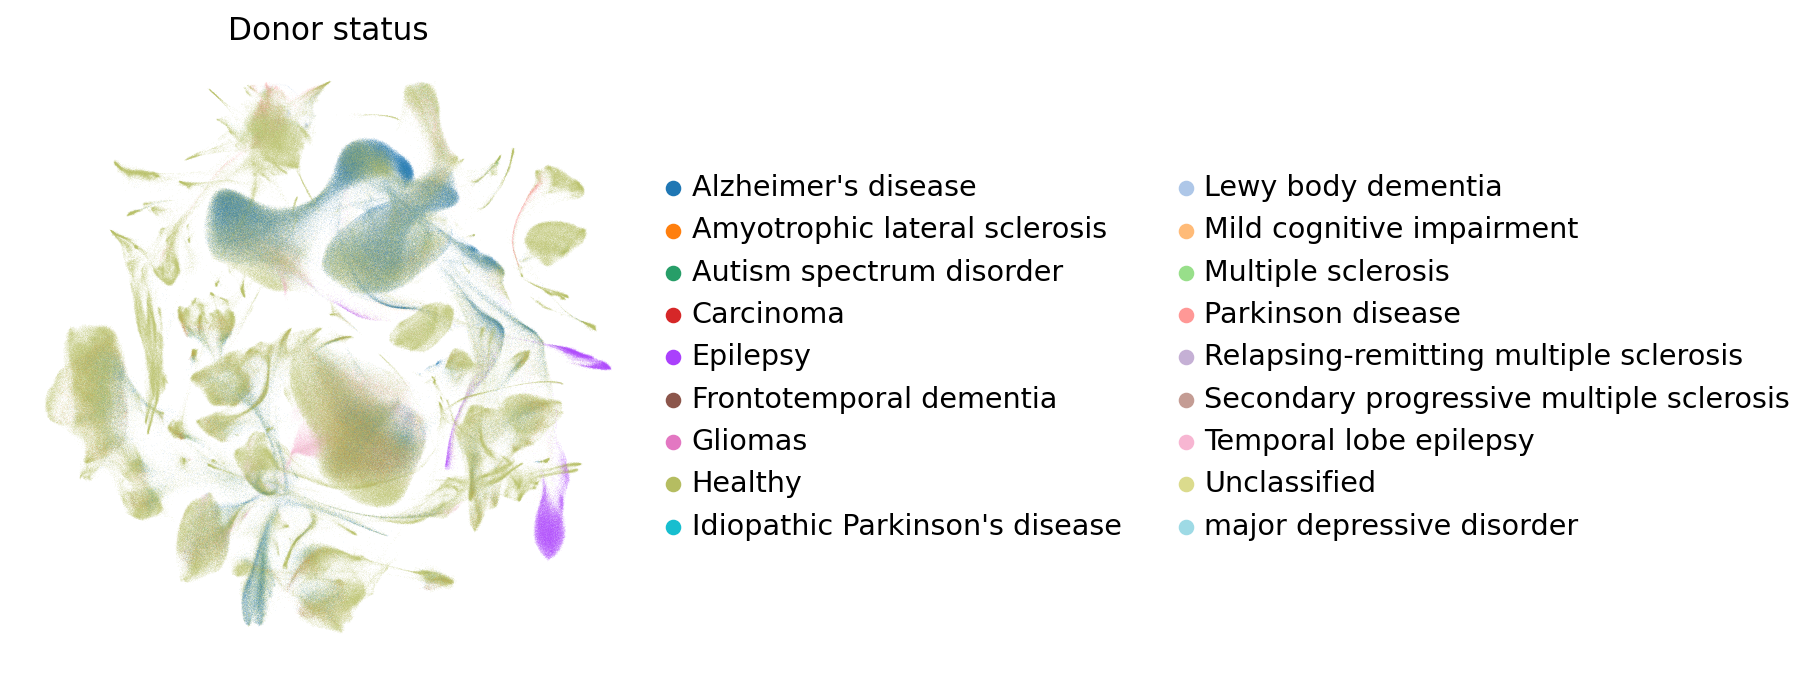

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['donor_status'], frameon=False, title='Donor status')

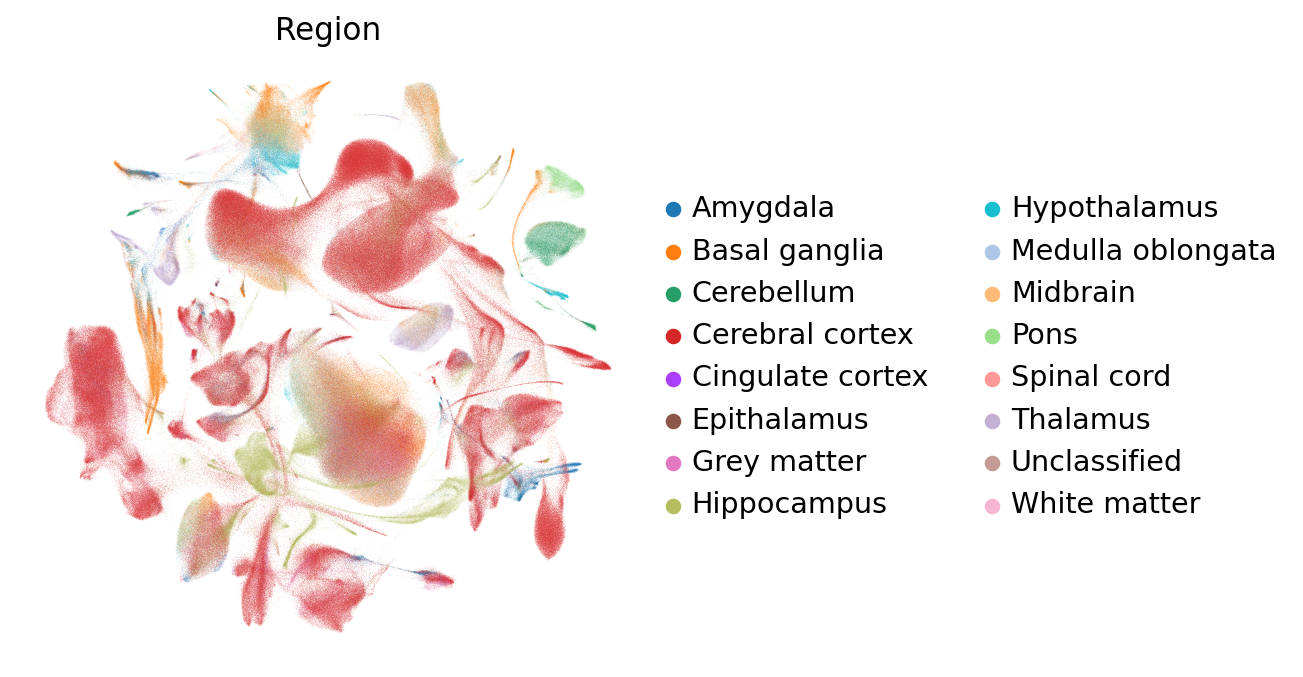

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['region'], frameon=False, title='Region')

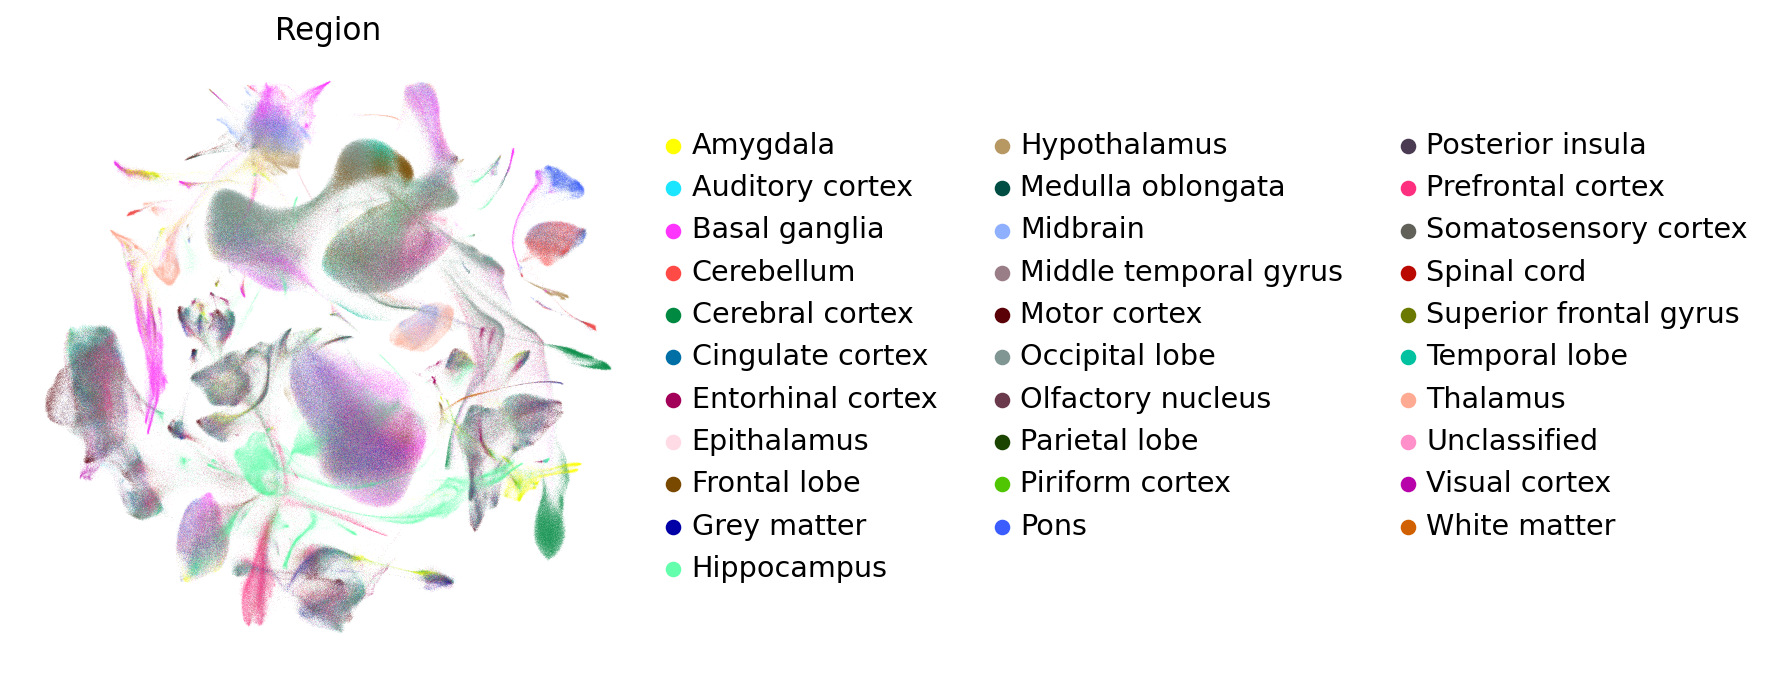

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['DEGregion'], frameon=False, title='Region')

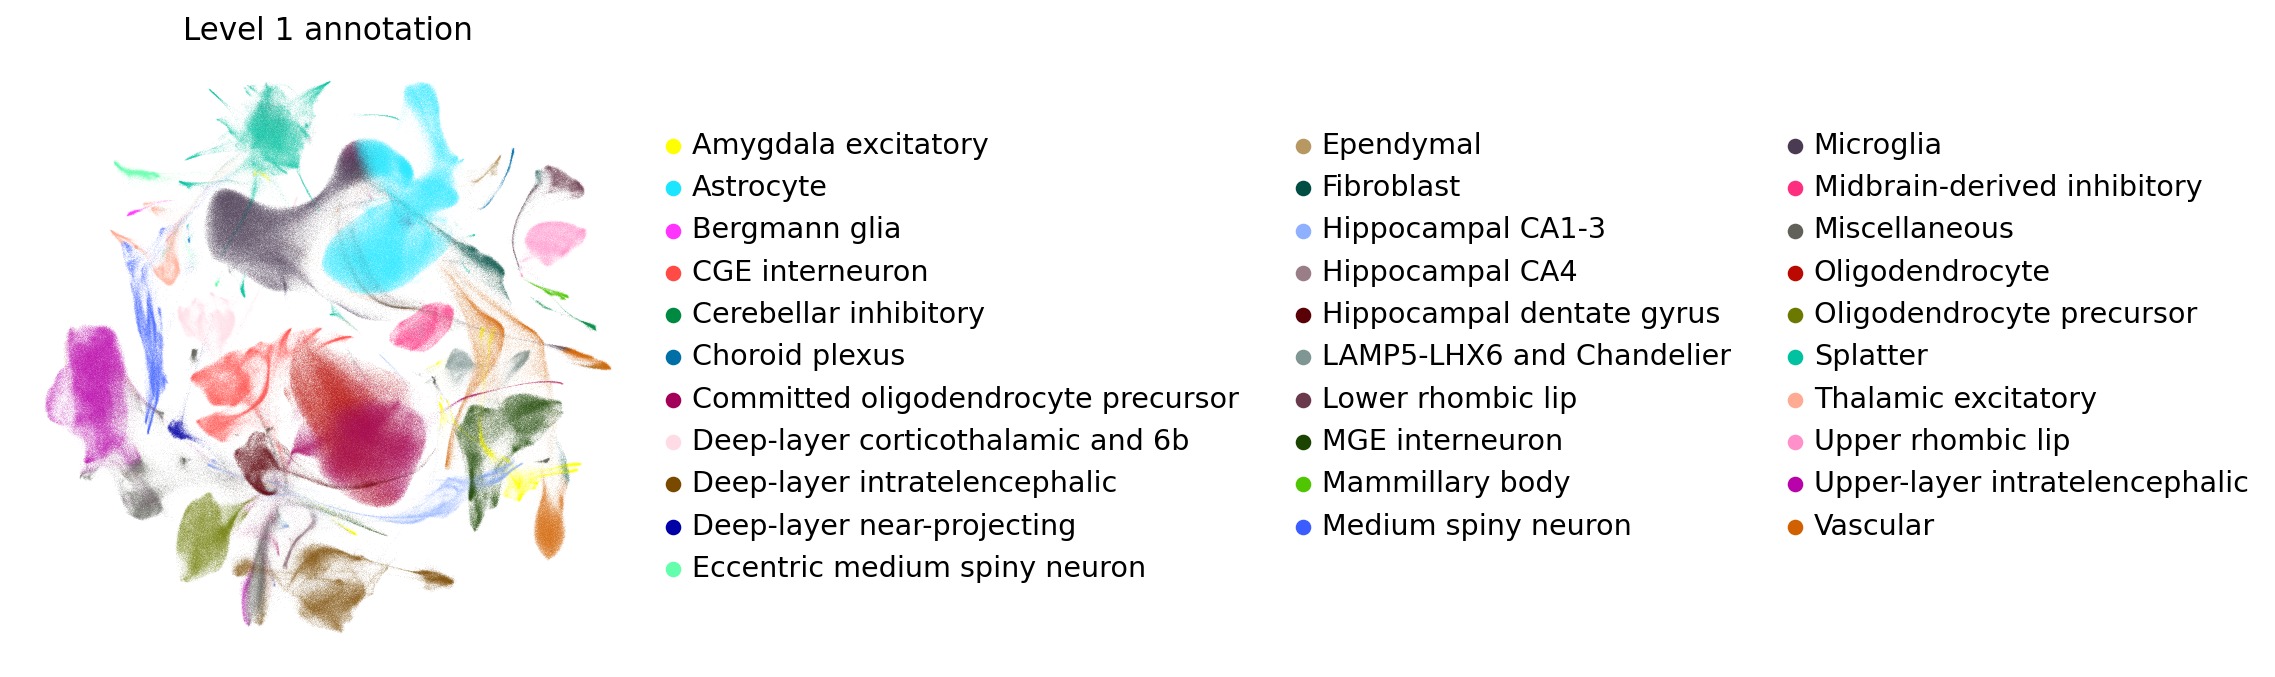

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['Siletti_modf_SCANVI_L1'], frameon=False, title='Level 1 annotation')

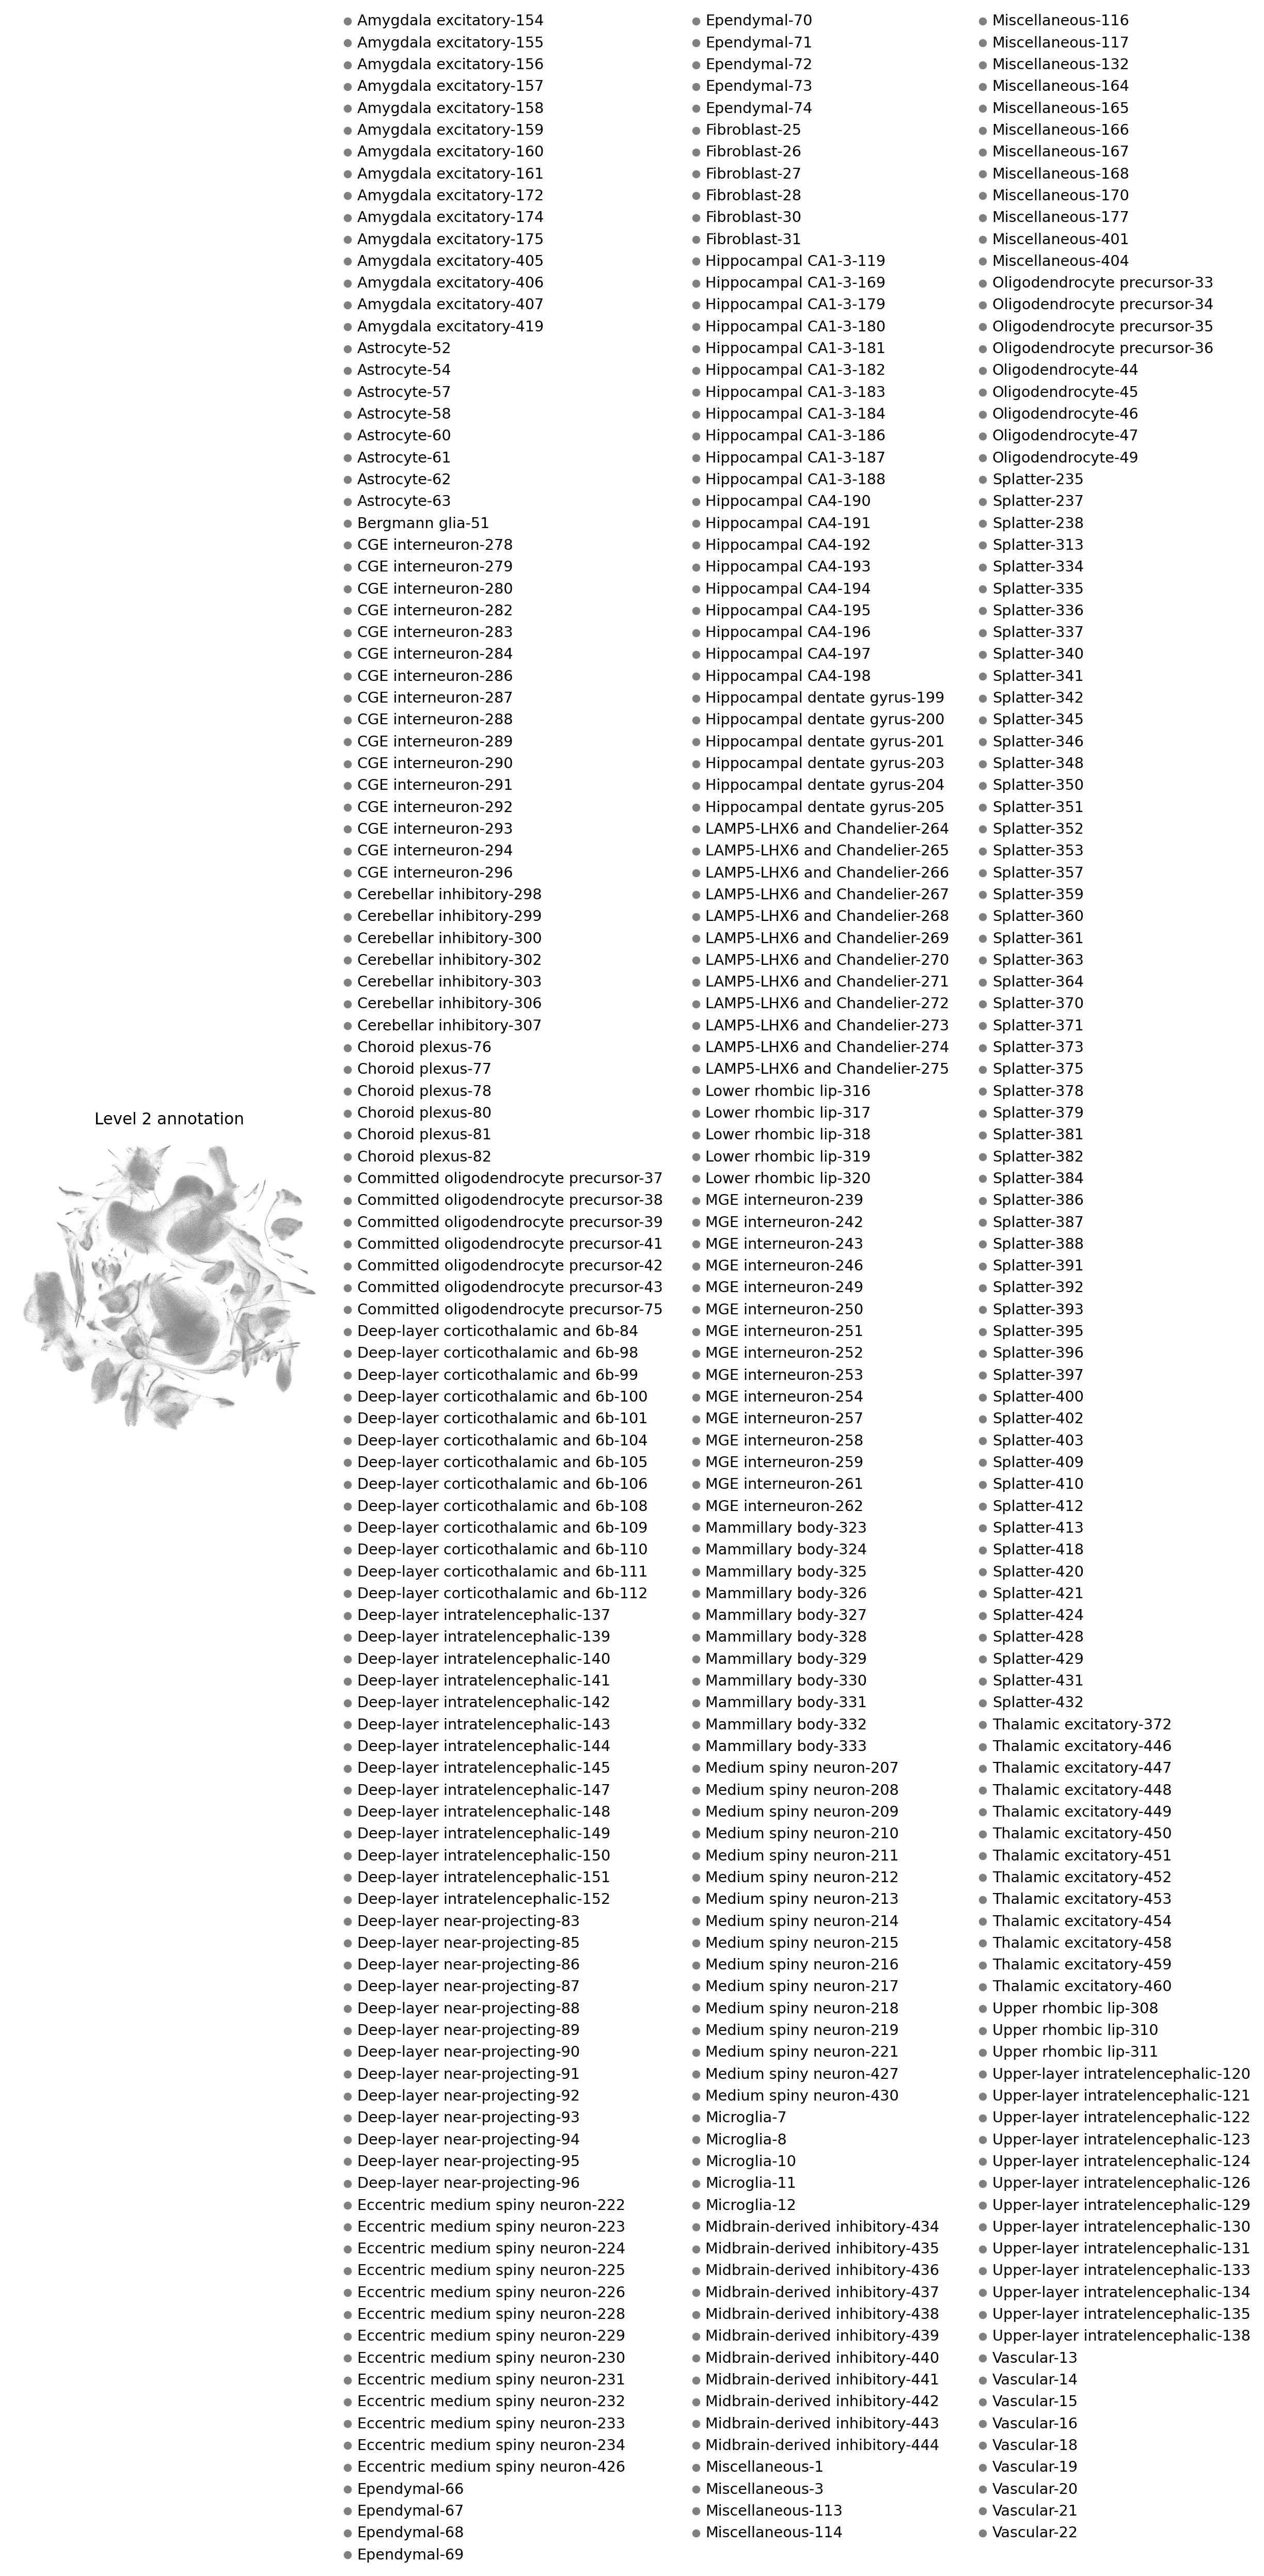

In [ ]:
figsize(5,5)
sc.pl.umap(ad, color=['Siletti_modf_SCANVI_L2'], frameon=False, title='Level 2 annotation')